In [151]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10, 6)

In [152]:
data = pd.read_csv('winequality-red.csv')
data.insert(data.shape[1] - 1,'red', 1)
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,red,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,1,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,1,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1,5


In [153]:
data2 = pd.read_csv('winequality-white.csv')
data2['red'] = 0
data2.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0


In [154]:
# Merging data with red and white wine
df = pd.merge(data, data2,how='outer')

# Removing Nan and duplicates
df.dropna(how='any',inplace=True)
df.drop_duplicates(inplace=True)

# Changing the columns name
df = df.rename(columns={'fixed acidity':'f_acidity','volatile acidity':'v_acidity','citric acid':'c_acid',
                       'residual sugar':'r_sugar','free sulfur dioxide':'f_s_dioxide',
                        'total sulfur dioxide':'t_s_dioxide'})

# Check type of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5320 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   f_acidity    5320 non-null   float64
 1   v_acidity    5320 non-null   float64
 2   c_acid       5320 non-null   float64
 3   r_sugar      5320 non-null   float64
 4   chlorides    5320 non-null   float64
 5   f_s_dioxide  5320 non-null   float64
 6   t_s_dioxide  5320 non-null   float64
 7   density      5320 non-null   float64
 8   pH           5320 non-null   float64
 9   sulphates    5320 non-null   float64
 10  alcohol      5320 non-null   float64
 11  red          5320 non-null   int64  
 12  quality      5320 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 581.9 KB


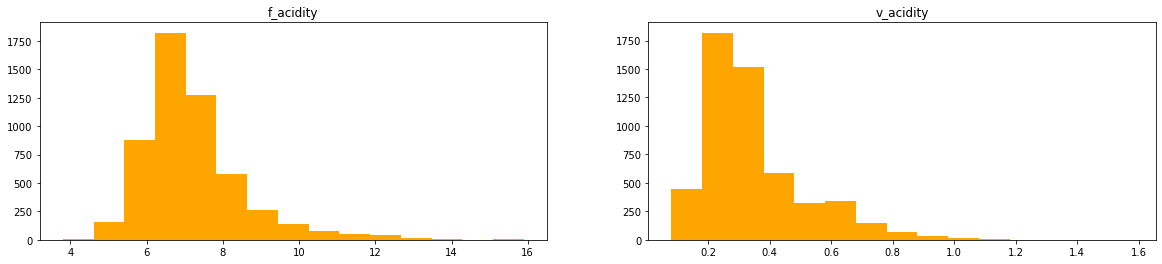

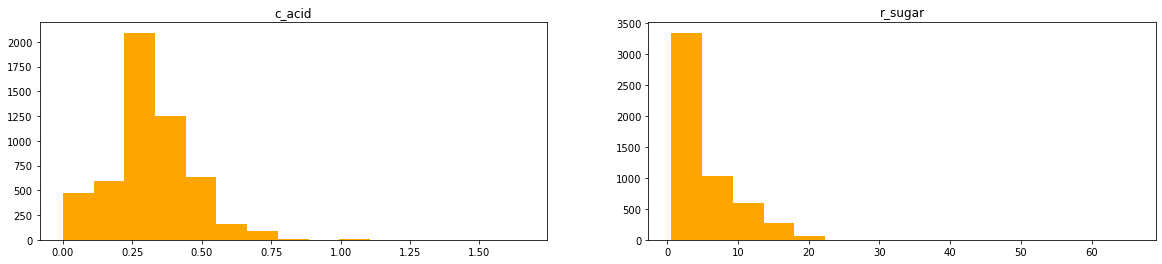

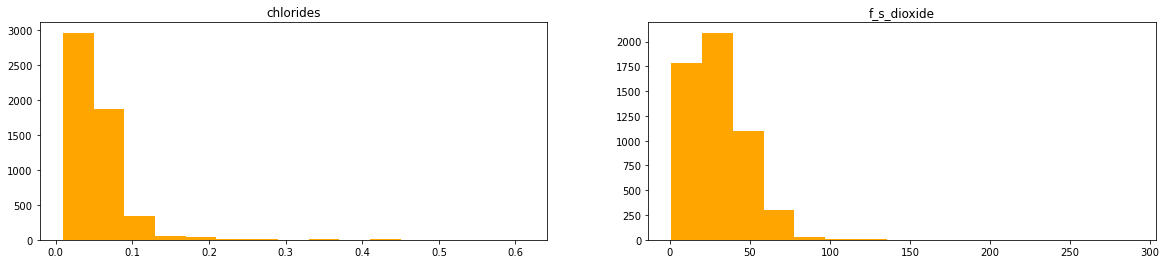

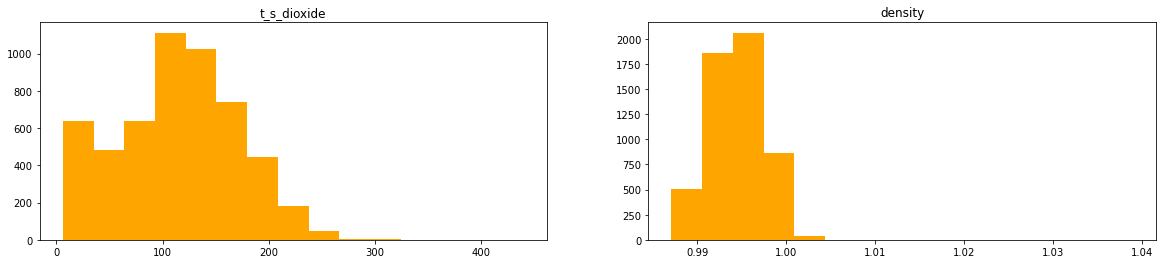

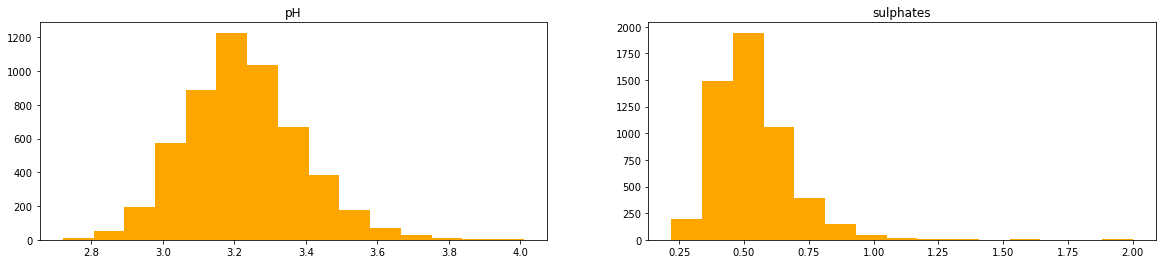

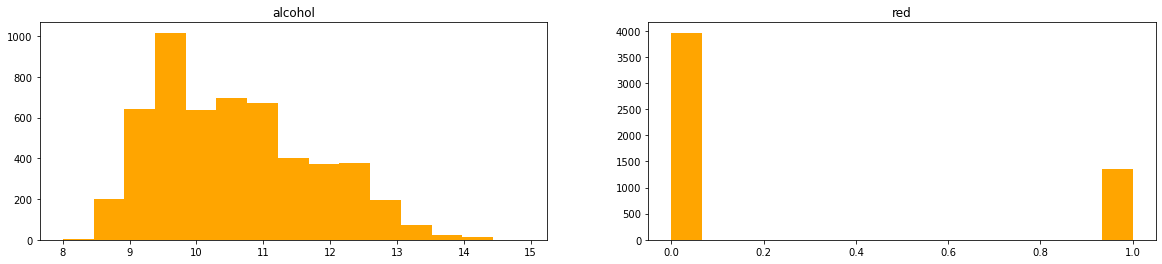

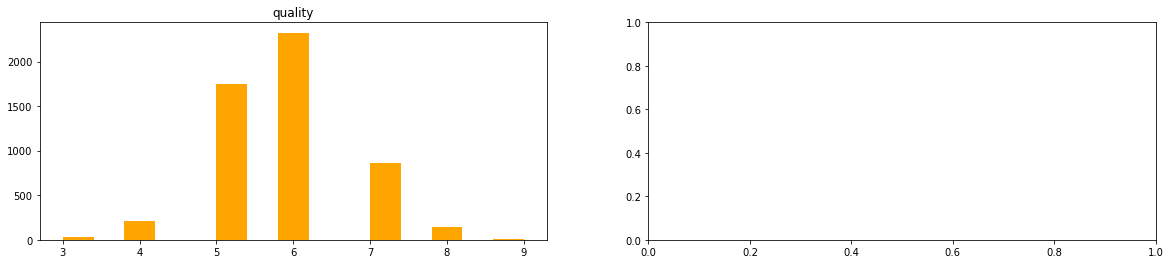

In [155]:
for i in range(13):
    if i % 2 == 0:
        fig = plt.figure(figsize=(20, 4))
        ax = fig.add_subplot(121)
        ax2 = fig.add_subplot(122)
        ax.hist(df[[df.columns[i]]],15,color='orange')
        ax.set_title(df.columns[i])
    else:
        ax2.hist(df[df.columns[i]],15,color='orange')
        ax2.set_title(df.columns[i])
        plt.show

<AxesSubplot:>

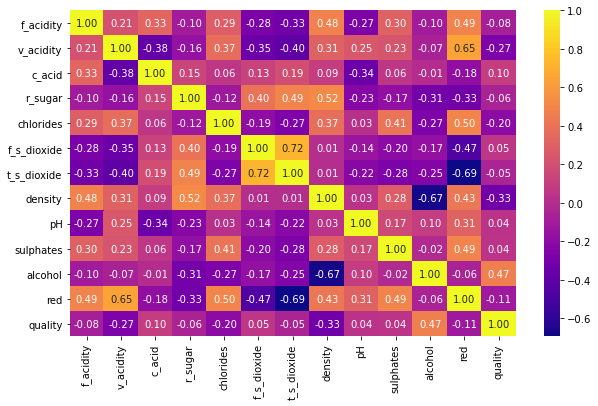

In [156]:
sns.heatmap(df.corr(), cmap='plasma', annot=True, fmt=".2f")

In [157]:
df = df.drop(['f_acidity','c_acid','r_sugar','f_s_dioxide','pH','sulphates'],axis=1)
df.head()

,v_acidity,chlorides,t_s_dioxide,density,alcohol,red,quality
0,0.70,0.076,34.0,0.9978,9.4,1,5
2,0.88,0.098,67.0,0.9968,9.8,1,5
3,0.76,0.092,54.0,0.9970,9.8,1,5
4,0.28,0.075,60.0,0.9980,9.8,1,6
5,0.66,0.075,40.0,0.9978,9.4,1,5


In [158]:
df.insert(df.shape[1]-1, 'low_alc', (df['alcohol'] <= 10.5).astype('int'))
df.insert(df.shape[1]-1, 'medium_alc', ((df['alcohol'] > 10.5)&(df['alcohol'] <= 12.5)).astype('int'))
df.insert(df.shape[1]-1, 'strongly_alc', (df['alcohol'] > 12.5).astype('int'))
df.head()

,v_acidity,chlorides,t_s_dioxide,density,alcohol,red,low_alc,medium_alc,strongly_alc,quality
0,0.70,0.076,34.0,0.9978,9.4,1,1,0,0,5
2,0.88,0.098,67.0,0.9968,9.8,1,1,0,0,5
3,0.76,0.092,54.0,0.9970,9.8,1,1,0,0,5
4,0.28,0.075,60.0,0.9980,9.8,1,1,0,0,6
5,0.66,0.075,40.0,0.9978,9.4,1,1,0,0,5


##### The stronger the wine, the better it is.

<AxesSubplot:xlabel='strongly_alc'>

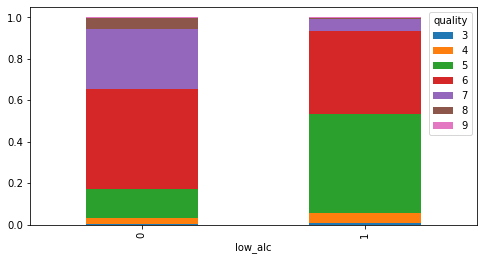

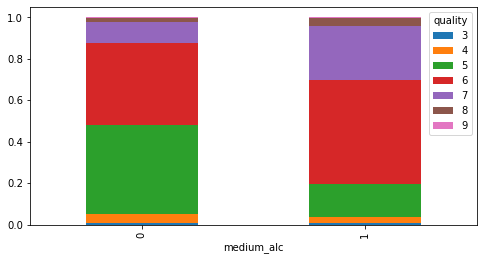

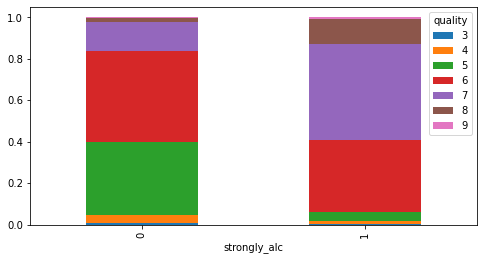

In [159]:
table=pd.crosstab(df['low_alc'], df['quality'])
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True,figsize=(8, 4))
table=pd.crosstab(df['medium_alc'], df['quality'])
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True,figsize=(8, 4))
table=pd.crosstab(df['strongly_alc'], df['quality'])
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True,figsize=(8, 4))

In [160]:
df.insert(df.shape[1]-1, 'low_dens', (df['density'] <= 0.99).astype('int'))
df.insert(df.shape[1]-1, 'medium_dens', ((df['density'] > 0.992)&(df['density'] <= 0.998)).astype('int'))
df.insert(df.shape[1]-1, 'high_dens', (df['density'] > 0.998).astype('int'))
df.head()

,v_acidity,chlorides,t_s_dioxide,density,alcohol,red,low_alc,medium_alc,strongly_alc,low_dens,medium_dens,high_dens,quality
0,0.70,0.076,34.0,0.9978,9.4,1,1,0,0,0,1,0,5
2,0.88,0.098,67.0,0.9968,9.8,1,1,0,0,0,1,0,5
3,0.76,0.092,54.0,0.9970,9.8,1,1,0,0,0,1,0,5
4,0.28,0.075,60.0,0.9980,9.8,1,1,0,0,0,1,0,6
5,0.66,0.075,40.0,0.9978,9.4,1,1,0,0,0,1,0,5


##### High density is bad for wine

<AxesSubplot:xlabel='high_dens'>

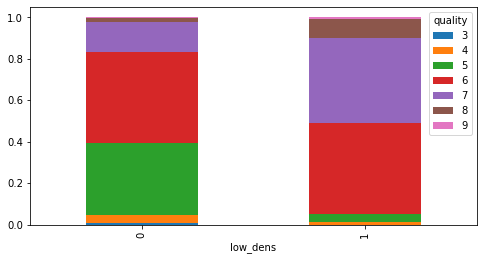

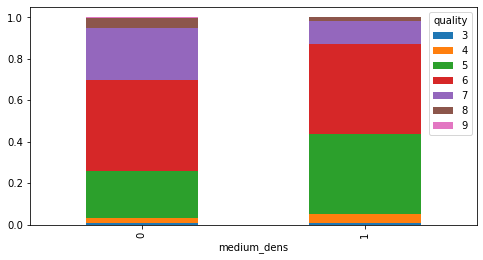

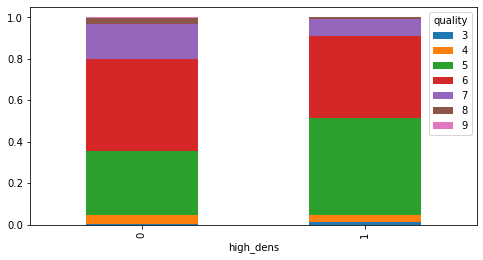

In [161]:
table=pd.crosstab(df['low_dens'], df['quality'])
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True,figsize=(8, 4))
table=pd.crosstab(df['medium_dens'], df['quality'])
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True,figsize=(8, 4))
table=pd.crosstab(df['high_dens'], df['quality'])
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True,figsize=(8, 4))

In [166]:
df_prepared = df[['v_acidity', 'chlorides', 't_s_dioxide', 'density', 'alcohol', 'red', 'quality']]
df_prepared.head()

,v_acidity,chlorides,t_s_dioxide,density,alcohol,red,quality
0,0.70,0.076,34.0,0.9978,9.4,1,5
2,0.88,0.098,67.0,0.9968,9.8,1,5
3,0.76,0.092,54.0,0.9970,9.8,1,5
4,0.28,0.075,60.0,0.9980,9.8,1,6
5,0.66,0.075,40.0,0.9978,9.4,1,5


In [168]:
df_prepared.to_csv('wine_prepared.csv', index=False)